In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,NaN,0.0,0.48,0.22
1,0.43,0.67,NaN,0.27,0.5,0.0,0.53,0.22
2,0.64,NaN,0.49,0.15,0.5,NaN,0.53,0.22
3,0.58,0.44,NaN,0.13,0.5,NaN,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,NaN
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,0.47,0.18,0.5,NaN,0.50,0.22
1480,0.35,NaN,0.46,0.14,0.5,0.0,0.54,NaN
1481,0.41,0.47,0.50,0.14,NaN,0.0,0.53,0.37
1482,0.51,NaN,0.62,NaN,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	222
float64		column 2	445
float64		column 3	519
float64		column 4	148
float64		column 5	296
float64		column 6	223
float64		column 7	371
float64		column 8	148


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1262.000000,1039.000000,965.000000,1336.000000,1188.000000,1261.000000,1113.000000,1336.000000
mean,0.500198,0.499269,0.504767,0.259012,0.504630,0.008168,0.500863,0.274259
std,0.131699,0.115077,0.070535,0.132548,0.047909,0.078704,0.052828,0.103639
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.430000,0.470000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.560000,0.540000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,0.790000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

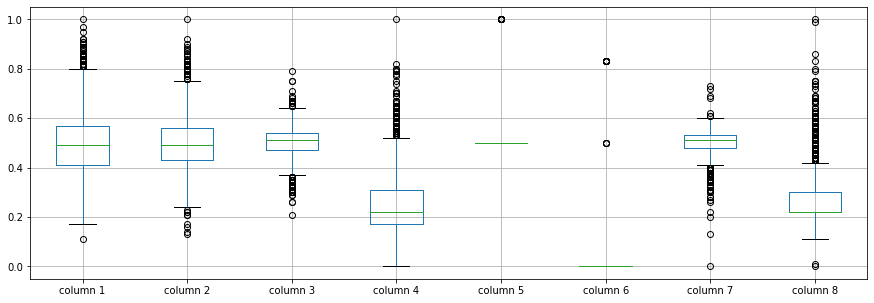

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500198
column 2    0.499269
column 3    0.504767
column 4    0.259012
column 5    0.504630
column 6    0.008168
column 7    0.500863
column 8    0.274259
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.513458,-0.185555,0.153596,0.050711,0.007606,0.034685,-0.135233
column 2,0.513458,1.000000,-0.272093,0.140440,0.059686,0.049988,0.052937,-0.067002
column 3,-0.185555,-0.272093,1.000000,0.001847,-0.032633,-0.015701,-0.148430,-0.018587
column 4,0.153596,0.140440,0.001847,1.000000,-0.042648,-0.005100,-0.068758,-0.052770
column 5,0.050711,0.059686,-0.032633,-0.042648,1.000000,-0.011880,0.039167,0.005139
column 6,0.007606,0.049988,-0.015701,-0.005100,-0.011880,1.000000,0.019553,-0.036906
column 7,0.034685,0.052937,-0.148430,-0.068758,0.039167,0.019553,1.000000,0.059824
column 8,-0.135233,-0.067002,-0.018587,-0.052770,0.005139,-0.036906,0.059824,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+26,8+26+26,8+26+26+26,8+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26,8+26+26+26,8+26+26,8+26,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.356050528909849
Epoch: 1 , loss: 1.9992499118265898
Epoch: 2 , loss: 1.8174635236677916
Epoch: 3 , loss: 1.7026250491971555
Epoch: 4 , loss: 1.5747105220089788
Epoch: 5 , loss: 1.5164403293443762
Epoch: 6 , loss: 1.446160562660383
Epoch: 7 , loss: 1.3772810891918514
Epoch: 8 , loss: 1.3093980900619342
Epoch: 9 , loss: 1.2753873298997465
Epoch: 10 , loss: 1.2224720379580623
Epoch: 11 , loss: 1.1748768376267475
Epoch: 12 , loss: 1.1577427834272385
Epoch: 13 , loss: 1.1218720804090085
Epoch: 14 , loss: 1.0923860014780709
Epoch: 15 , loss: 1.0819008823322214
Epoch: 16 , loss: 1.0396066580129706
Epoch: 17 , loss: 1.0424483321283176
Epoch: 18 , loss: 1.0124840302311855
Epoch: 19 , loss: 1.0100829575372778
Epoch: 20 , loss: 0.9877890840820645
Epoch: 21 , loss: 0.9691789577836576
Epoch: 22 , loss: 0.9809280199849088
Epoch: 23 , loss: 0.9436540856309559
Epoch: 24 , loss: 0.9317500396915104
Epoch: 25 , loss: 0.

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.430000
column 2    0.440000
column 3    0.480000
column 4    0.220000
column 5    0.443120
column 6    0.000000
column 7    0.441746
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,-0.097645,0.000000,0.0,0.000000
1,0.000000,0.000000,0.022241,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,-0.368323,0.000000,0.000000,0.000000,0.000104,0.0,0.000000
3,0.000000,0.000000,-0.117102,0.000000,0.000000,-0.000368,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.086935
...,...,...,...,...,...,...,...,...
1479,0.000000,-0.219342,0.000000,0.000000,0.000000,-0.000281,0.0,0.000000
1480,0.000000,0.157169,0.000000,0.000000,0.000000,0.000000,0.0,-0.417029
1481,0.000000,0.000000,0.000000,0.000000,-0.218459,0.000000,0.0,0.000000
1482,0.000000,0.015877,0.000000,-0.005423,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.833749661816439, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.16701615331066752

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.598307
column 4    0.230000
column 5    0.500000
column 6   -0.000305
column 7    0.604708
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.130000,0.402355,0.000000,0.48,0.220000
1,0.430000,0.670000,0.502241,0.270000,0.500000,0.000000,0.53,0.220000
2,0.640000,0.251677,0.490000,0.150000,0.500000,0.000104,0.53,0.220000
3,0.580000,0.440000,0.452898,0.130000,0.500000,-0.000368,0.54,0.220000
4,0.420000,0.440000,0.480000,0.540000,0.500000,0.000000,0.48,0.306935
...,...,...,...,...,...,...,...,...
1479,0.820000,0.410658,0.470000,0.180000,0.500000,-0.000281,0.50,0.220000
1480,0.350000,0.447169,0.460000,0.140000,0.500000,0.000000,0.54,0.242971
1481,0.410000,0.470000,0.500000,0.140000,0.281541,0.000000,0.53,0.370000
1482,0.510000,0.465877,0.620000,0.244577,0.500000,0.000000,0.59,0.220000


In [21]:
imputations[-1].to_excel("Yeast_NN_20(imp).xlsx", index=False, header=False)